[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\claud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\claud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\claud\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\claud\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Numarul de propozitii din text 10
Numarul de cuvinte din text 160
Numarul de cuvinte diferite din text 92
Cel mai scurt si cel mai lung cuvant (cuvinte) (['confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm'], ['3', 'o', 'e'])
Textul fara diacritice Mesaj de informare: 
Cursul si laboratoarele de Inteligenta Artificiala vor fi o 
provocare pentru toti. Suntem convinsi ca veti realiza proiecte 
foarte interesante. Va incurajam sa adresati intrebari atunci 
cand ceva nu e clar, atat in mod live, cat si folosind platforma 
Teams, canalul ”general”.
Daca ati citit pana aici, va rugam sa lasati un mesaj pe canalul 
general cu textul ”Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm ca am citit
textul pentru problema 3 din lab2”.
--
Mesaj de informare generat de ChatGPT:
Stimati cursanti,
Suntem incantati sa va avem in echipa noastra pentru Cursul si 
laboratoarele de Inteligenta Artificiala. Aceasta experienta va 
fi o adevarata provocare, dar suntem convinsi ca veti realiza 
proiecte extrem de interesante.
Va incurajam

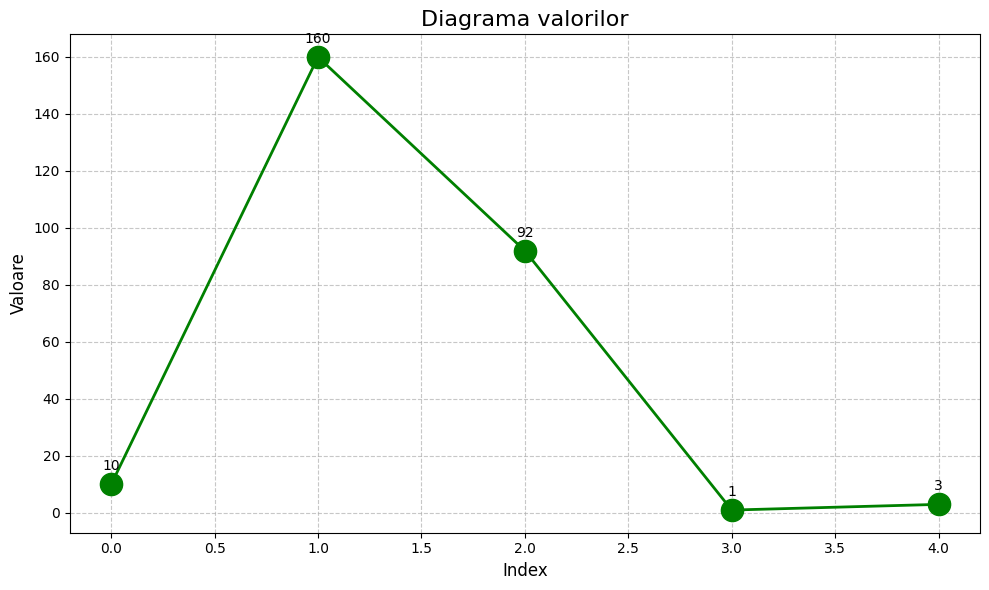

In [1]:
#3.Se da un fisier care contine un text (format din mai multe propozitii) in limba romana - a se vedea fisierul ”data/texts.txt”. Se cere sa se determine si sa se vizualizeze:

# a. numarul de propozitii din text;
# b. numarul de cuvinte din text
# c. numarul de cuvinte diferite din text
# d. cel mai scurt si cel mai lung cuvant (cuvinte)
# e. textul fara diacritice
# f. sinonimele celui mai lung cuvant din text

import nltk
import unicodedata
from nltk.corpus import wordnet
from matplotlib import pyplot as plt

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# o diagrama care curpidne punctele a,b,c,d legate 
def diagram(data):
    plt.figure(figsize=(10, 6))

    indices = list(range(len(data)))

    plt.plot(indices, data, marker='o', linestyle='-', color='green', linewidth=2, markersize=16)

    for i, value in enumerate(data):
        plt.text(i, value + 5, str(value), ha='center')

    plt.title('Diagrama valorilor', fontsize=16)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel('Valoare', fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()

    plt.show()

# incarca text din fisier
# paramterii : calea catre fisier
def load(fp):
    with open(fp, 'r', encoding="utf-8") as f:
        text = f.read()
    return text

# numar de propozitii
def point_a(text):
    sentences = nltk.sent_tokenize(text)
    return len(sentences)

# numar de cuvinte din text
def point_b(text):
    words = nltk.word_tokenize(text)
    words_nosign = [word for word in words if word.isalnum()]
    return len(words_nosign)

#numar de cuvinte unice din text
def point_c(text):
    words = nltk.word_tokenize(text)
    words_nosign = set([word.lower() for word in words if(word.isalnum())])
    return len(words_nosign)

# cel mai scurt si cel mai lung cuvint sau cuvinte (e.g in cazul minimului sunt mai multe litere de lungime 1)
def point_d(text):
    words = nltk.word_tokenize(text)
    unique_words = set([word.lower() for word in words if word.isalnum()])
    maxim = max(unique_words, key=len)
    minim = min(unique_words, key=len)
    lista_maxim = [word for word in unique_words if len(word) == len(maxim)]
    lista_minim = [word for word in unique_words if len(word) == len(minim)]
    return lista_maxim, lista_minim

# text fara diacrtice
def point_e(text):
    text_normalizat = unicodedata.normalize('NFD', text)
    new_text = ''.join(c for c in text_normalizat if unicodedata.category(c) != 'Mn')
    return new_text

# gasirea sinonimelor -> traduce doar pt cuvinte uzuale cazul confiiirm nu il gaseste
def point_f(word, lang = "ron"):
    sinonime = set()
    for syn in wordnet.synsets(word, lang=lang): 
        for lemma in syn.lemmas(lang=lang):
            sinonime.add(lemma.name())

    return list(sinonime)

def apel_f(rez):
    for r in rez:
        point_f(r)

filepath = "data/texts.txt"
txt = load(filepath)
print("Numarul de propozitii din text",point_a(txt))
print("Numarul de cuvinte din text",point_b(txt))
print("Numarul de cuvinte diferite din text",point_c(txt))
print("Cel mai scurt si cel mai lung cuvant (cuvinte)",point_d(txt))
print("Textul fara diacritice",point_e(txt))
rezE = point_d(txt)
print("Format cu full i:", apel_f(rezE[0]))
print("Alte exemple:")
print(point_f("confirmare"))
print(point_f("frumos"))

# Diagrama cu rezultate

a = point_a(txt)
b = point_b(txt)
c = point_c(txt)
d = point_d(txt)
md = len(d[0])
md1 = len(d[1])
lista = [a, b, c, md, md1]
diagram(lista)